# Analysis

In [27]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Load Data

In [28]:
df_raw = pd.read_csv("results.csv", sep=';', header=None, names=["algo", "threads", "t", "t1", "t2", "t3", "t4"])
df_raw.head()

,algo,threads,t,t1,t2,t3,t4
0,sort_2,2,2.073155,0.045283,0.974320,0.970887,0.082585
1,sort_2,2,1.913469,0.044951,0.823353,0.962586,0.082492
2,sort_2,2,1.983987,0.045269,0.906957,0.948947,0.082721
3,sort_2,2,1.926093,0.045222,0.841189,0.956972,0.082618
4,sort_2,2,1.919399,0.045357,0.841503,0.949511,0.082943


In [29]:
df = df_raw.groupby(['algo', 'threads']).agg(
    t_mean=('t', 'mean'), t_std=('t', 'std'),
    t1_mean=('t1', 'mean'), t1_std=('t1', 'std'),
    t2_mean=('t2', 'mean'), t2_std=('t2', 'std'),
    t3_mean=('t3', 'mean'), t3_std=('t3', 'std'),
    t4_mean=('t4', 'mean'), t4_std=('t4', 'std')
).reset_index()

df.head()

,algo,threads,t_mean,t_std,t1_mean,t1_std,t2_mean,t2_std,t3_mean,t3_std,t4_mean,t4_std
0,sort_2,1,2.842012,0.012368,0.088158,0.000076,0.703625,0.009987,1.925867,0.004744,0.124348,0.000105
1,sort_2,2,1.927668,0.057044,0.045067,0.000332,0.843938,0.054258,0.956203,0.006231,0.082372,0.000600
2,sort_2,3,1.260657,0.006336,0.029546,0.000024,0.533000,0.005613,0.640010,0.002057,0.058001,0.000014
3,sort_2,4,1.023797,0.012572,0.022539,0.000163,0.471610,0.012392,0.483599,0.001546,0.045901,0.000401
4,sort_2,5,0.789577,0.002500,0.017815,0.000025,0.349190,0.002484,0.385588,0.000879,0.036836,0.000015


# Execution time

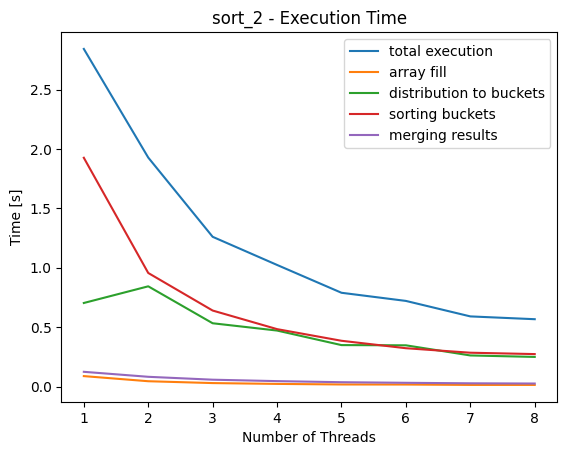

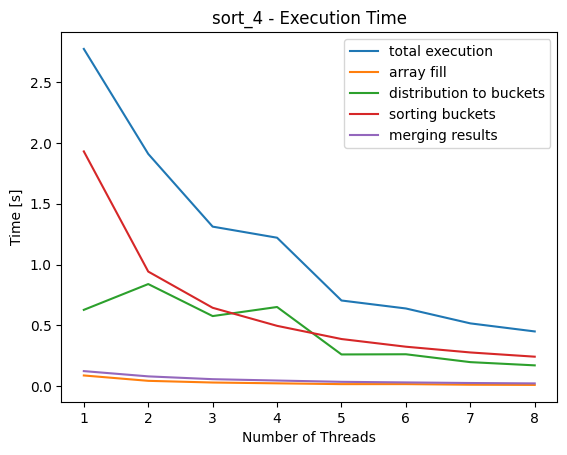

In [30]:
for series in df.groupby(["algo"]):
    series_df = series[1]
    series_nm = series[0][0]
    
    plt.plot(series_df["threads"], series_df["t_mean"], label="total execution")
    plt.plot(series_df["threads"], series_df["t1_mean"], label="array fill")
    plt.plot(series_df["threads"], series_df["t2_mean"], label="distribution to buckets")
    plt.plot(series_df["threads"], series_df["t3_mean"], label="sorting buckets")
    plt.plot(series_df["threads"], series_df["t4_mean"], label="merging results")
    
    plt.title(f"{series_nm} - Execution Time")
    plt.legend()
    plt.xlabel("Number of Threads")
    plt.ylabel("Time [s]")
    plt.show()

# Speedup

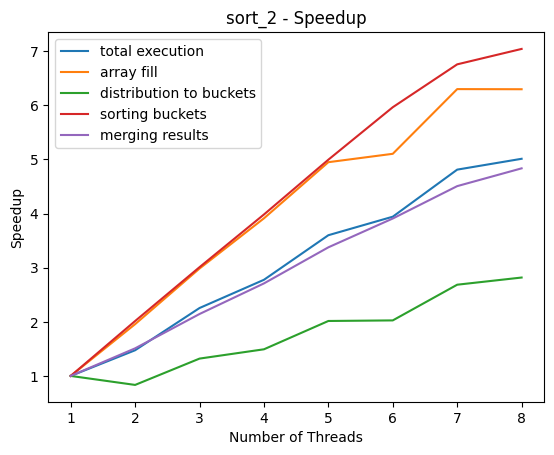

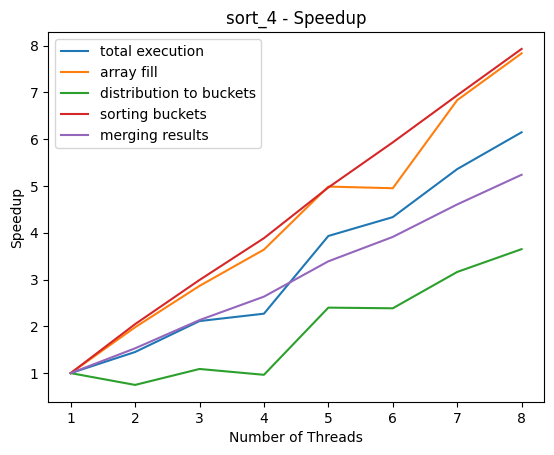

In [31]:
for series in df.groupby(["algo"]):
    series_df = series[1]
    series_nm = series[0][0]
    
    T1 = series_df[series_df["threads"] == 1]["t_mean"].values[0]
    T11 = series_df[series_df["threads"] == 1]["t1_mean"].values[0]
    T12 = series_df[series_df["threads"] == 1]["t2_mean"].values[0]
    T13 = series_df[series_df["threads"] == 1]["t3_mean"].values[0]
    T14 = series_df[series_df["threads"] == 1]["t4_mean"].values[0]
    
    plt.plot(series_df["threads"], T1/series_df["t_mean"], label="total execution")
    plt.plot(series_df["threads"], T11/series_df["t1_mean"], label="array fill")
    plt.plot(series_df["threads"], T12/series_df["t2_mean"], label="distribution to buckets")
    plt.plot(series_df["threads"], T13/series_df["t3_mean"], label="sorting buckets")
    plt.plot(series_df["threads"], T14/series_df["t4_mean"], label="merging results")
    
    plt.title(f"{series_nm} - Speedup")
    plt.legend()
    plt.xlabel("Number of Threads")
    plt.ylabel("Speedup")
    plt.show()